# Dataset 1 - Depression Dataset

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import requests
from io import StringIO
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

dataset1_url = "https://raw.githubusercontent.com/hbedros/data622-assignment4/main/data/dataset1.csv"
response1 = requests.get(dataset1_url, verify=False)
data1 = StringIO(response1.text)
dataset1 = pd.read_csv(data1)
print(dataset1.head())

   Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   
3      Unhealthy                                   Yes            7   
4        Healthy                                   Yes            4   

   Financial Stress Family History of Mental Illness Depression  
0                 2                              Y

c:\Users\Black\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [58]:
print(dataset1.info())
print(dataset1.isnull().sum())

dataset1 = dataset1.rename(columns = {'Have you ever had suicidal thoughts ?':'suicidal thoughts'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

As we can see, there are no missing values in this dataset, meaning we can move onto the EDA portion of this analysis with no issues.

# Exploratory Data Analysis

Frequency Distribution for Gender:
   Gender  Frequency
0    Male        267
1  Female        235


Frequency Distribution for Sleep Duration:
      Sleep Duration  Frequency
0          7-8 hours        128
1  More than 8 hours        128
2          5-6 hours        123
3  Less than 5 hours        123


Frequency Distribution for Dietary Habits:
  Dietary Habits  Frequency
0       Moderate        172
1      Unhealthy        169
2        Healthy        161


Frequency Distribution for suicidal thoughts:
  suicidal thoughts  Frequency
0               Yes        260
1                No        242


Frequency Distribution for Family History of Mental Illness:
  Family History of Mental Illness  Frequency
0                               No        265
1                              Yes        237


Frequency Distribution for Depression:
  Depression  Frequency
0        Yes        252
1         No        250




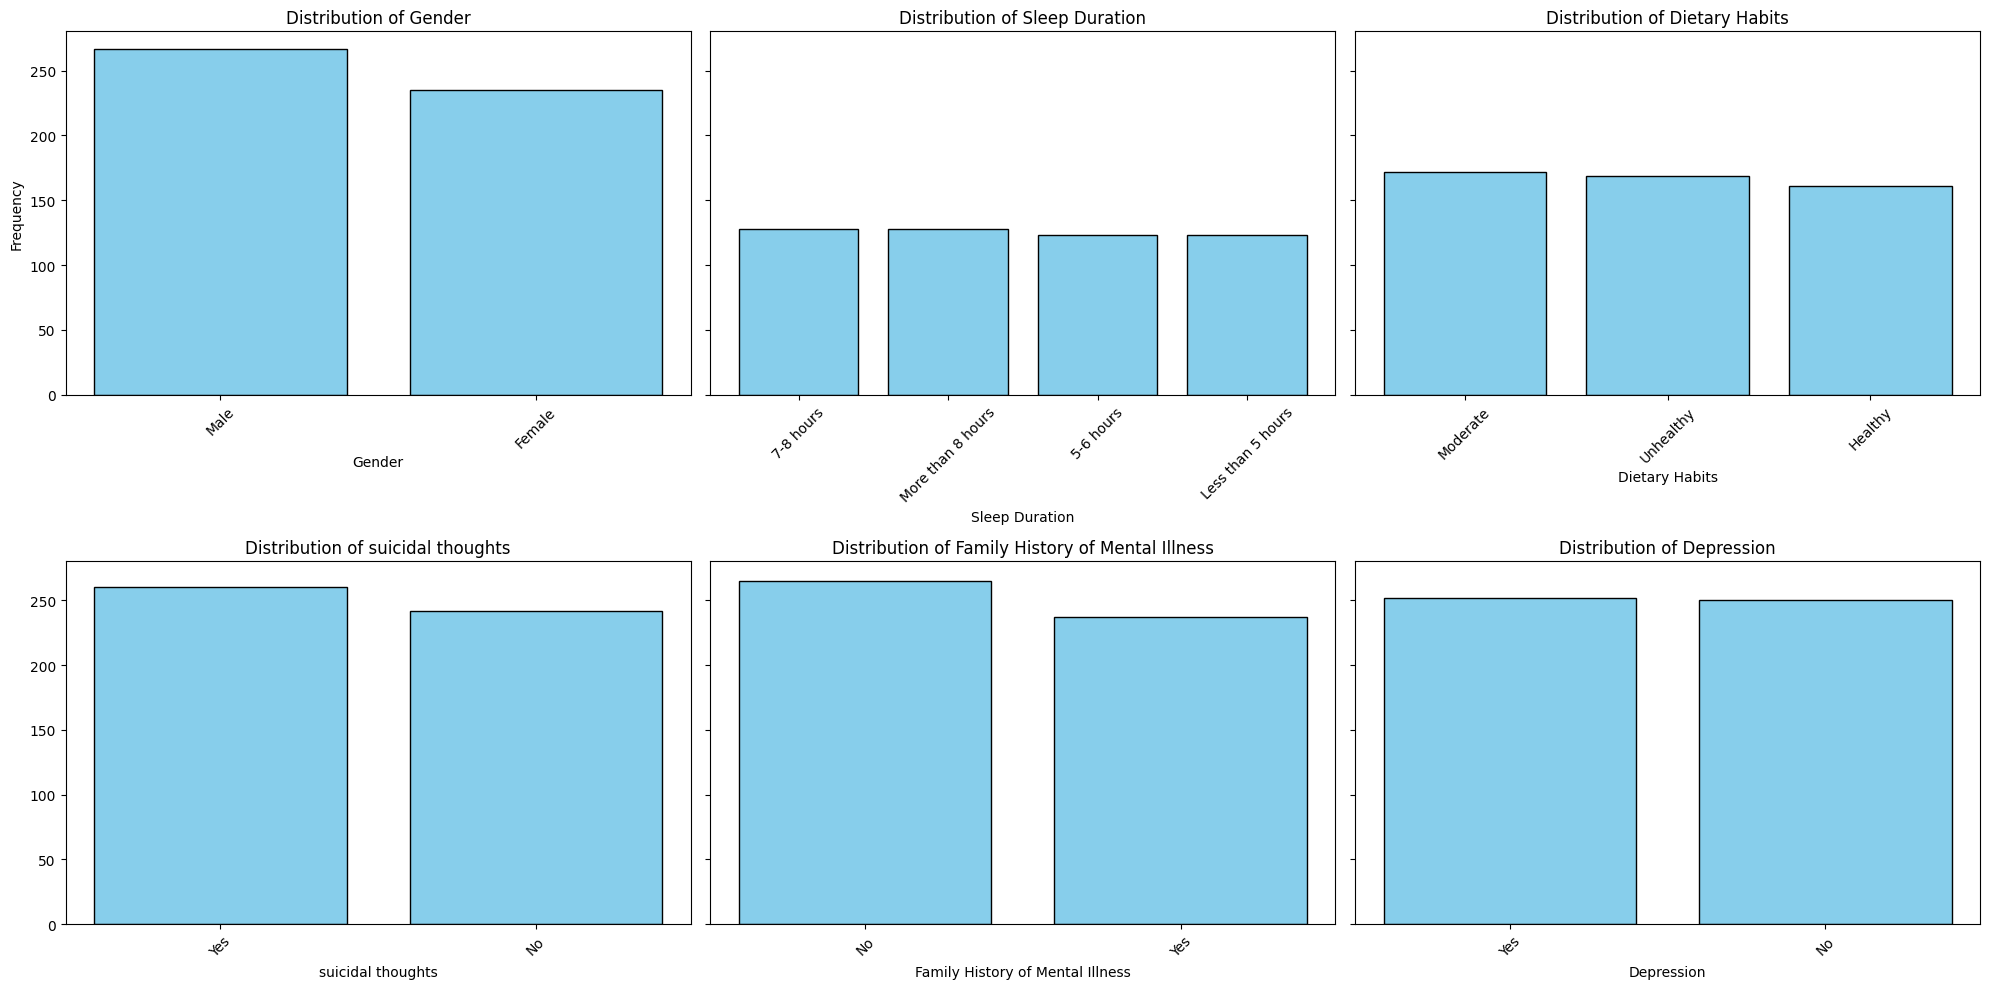

In [59]:
cat_vars_dep = ['Gender', 'Sleep Duration', 'Dietary Habits', 'suicidal thoughts', 'Family History of Mental Illness', 'Depression']

frequency_tables = {}

for var in cat_vars_dep:
    frequency = dataset1[var].value_counts().reset_index()
    frequency.columns = [var, 'Frequency']
    frequency_tables[var] = frequency
    
    print(f"Frequency Distribution for {var}:")
    print(frequency)
    print("\n")

n_rows = 2
n_cols = (len(cat_vars_dep) + 1) // n_rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharey=True)

for i, var in enumerate(cat_vars_dep):
    row, col = divmod(i, n_cols)
    frequency = frequency_tables[var]
    axes[row, col].bar(frequency[var], frequency['Frequency'], color='skyblue', edgecolor='black')
    axes[row, col].set_title(f"Distribution of {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].tick_params(axis='x', rotation=45)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

axes[0, 0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

In [60]:
numerical_stats_dep = dataset1[['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']].describe()
print(round(numerical_stats_dep, 2))

          Age  Academic Pressure  Study Satisfaction  Study Hours  \
count  502.00             502.00              502.00       502.00   
mean    26.24               3.00                3.08         6.40   
std      4.90               1.39                1.37         3.74   
min     18.00               1.00                1.00         0.00   
25%     22.00               2.00                2.00         3.00   
50%     26.50               3.00                3.00         7.00   
75%     30.00               4.00                4.00        10.00   
max     34.00               5.00                5.00        12.00   

       Financial Stress  
count            502.00  
mean               2.93  
std                1.43  
min                1.00  
25%                2.00  
50%                3.00  
75%                4.00  
max                5.00  


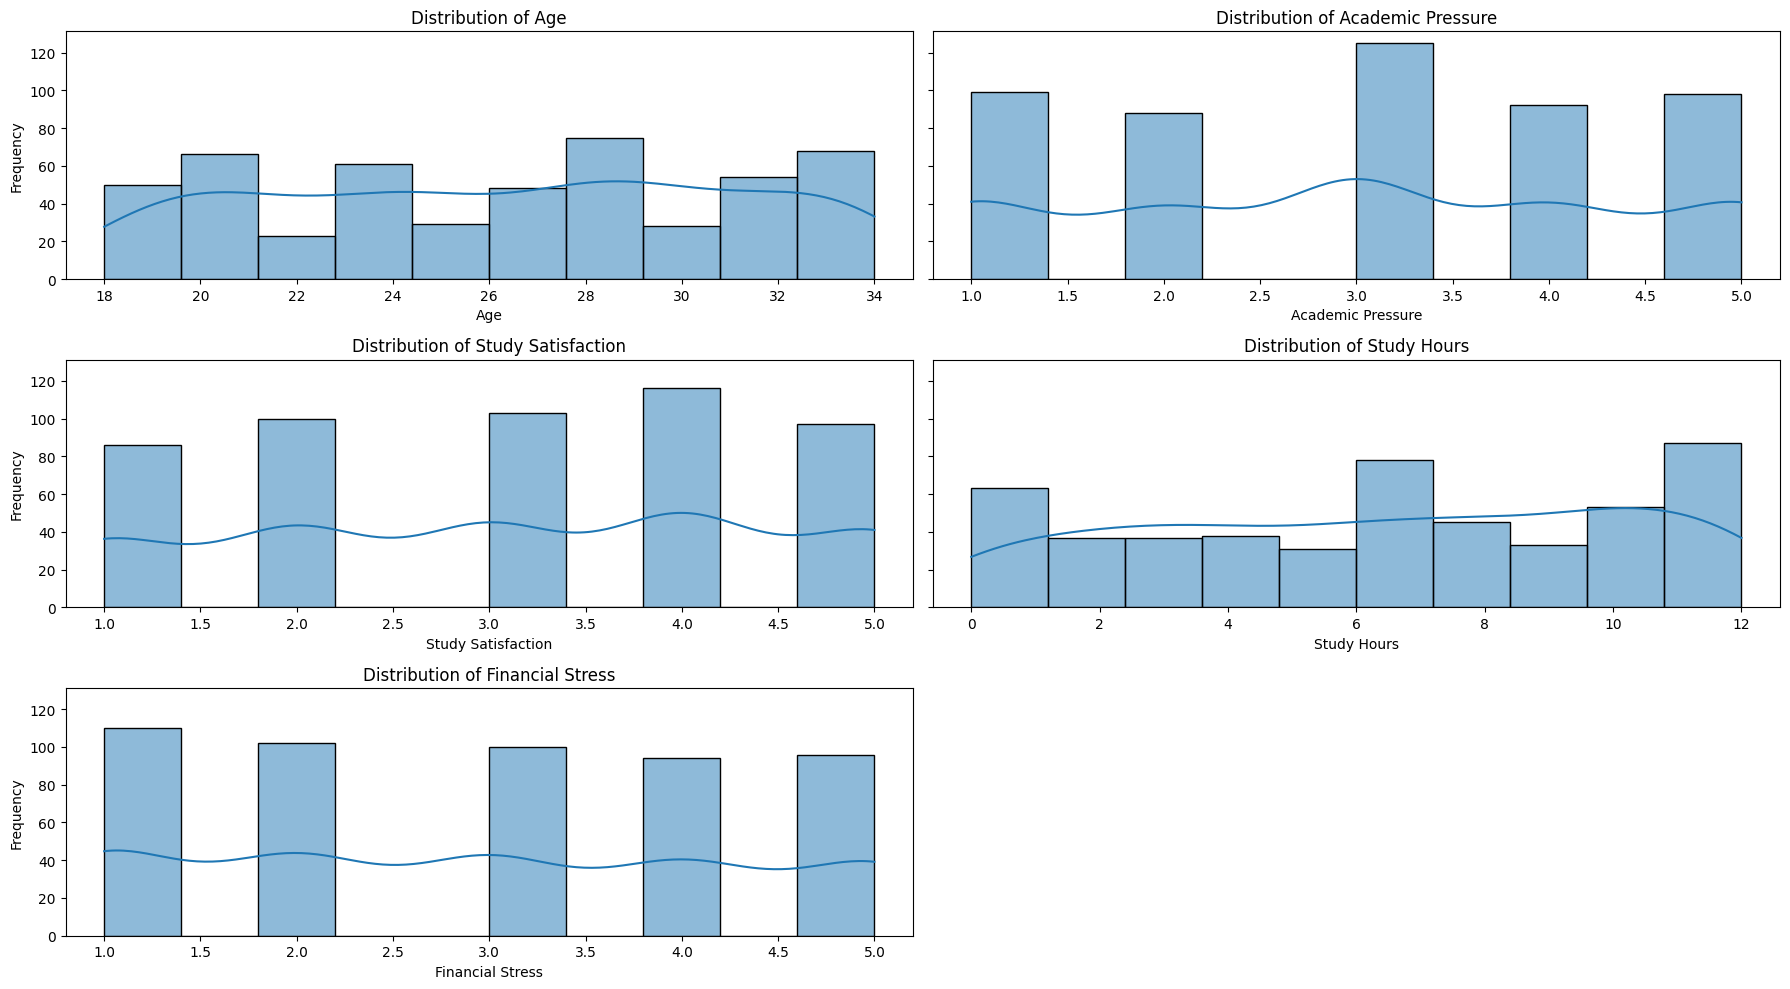

In [61]:
numerical_vars_dep = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']

fig, axes = plt.subplots(3, 2, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, var in enumerate(numerical_vars_dep):
    sns.histplot(dataset1[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Hide the last empty subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

As we can see, most of these variables follow a rather uniform distribution, which may impact our results of our models.

# Bivariate Assessments

                         Age  Academic Pressure  Study Satisfaction  \
Age                 1.000000           0.023960           -0.004300   
Academic Pressure   0.023960           1.000000           -0.102670   
Study Satisfaction -0.004300          -0.102670            1.000000   
Study Hours         0.054924           0.049792           -0.012268   
Financial Stress   -0.096265           0.002324           -0.039261   

                    Study Hours  Financial Stress  
Age                    0.054924         -0.096265  
Academic Pressure      0.049792          0.002324  
Study Satisfaction    -0.012268         -0.039261  
Study Hours            1.000000          0.013110  
Financial Stress       0.013110          1.000000  


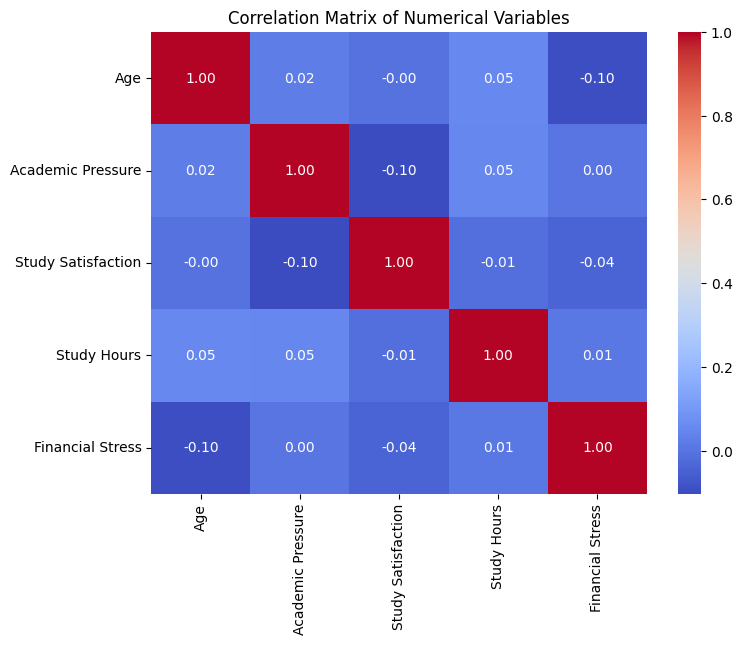

In [62]:
numeric_dataset_dep = dataset1.select_dtypes(include=[float, int])

correlation_matrix = numeric_dataset_dep.corr(method='spearman')

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

It would appear that correlations are very weak among predictors (even when adjusting for the lack of normality/linearity via the use of a Spearman correlation coefficient). This suggests that multicollinearity will not be a concern, at the very least.

In [63]:
# Function for Cramer's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Crosstab: Sleep Duration vs. Dietary Habits
Dietary Habits     Healthy  Moderate  Unhealthy
Sleep Duration                                 
Less than 5 hours       41        45         37
5-6 hours               52        41         30
7-8 hours               37        44         47
More than 8 hours       31        42         55

Chi-Squared Test Results: p-value = 0.024734283066575814
There is a significant association between Sleep Duration and Dietary Habits.



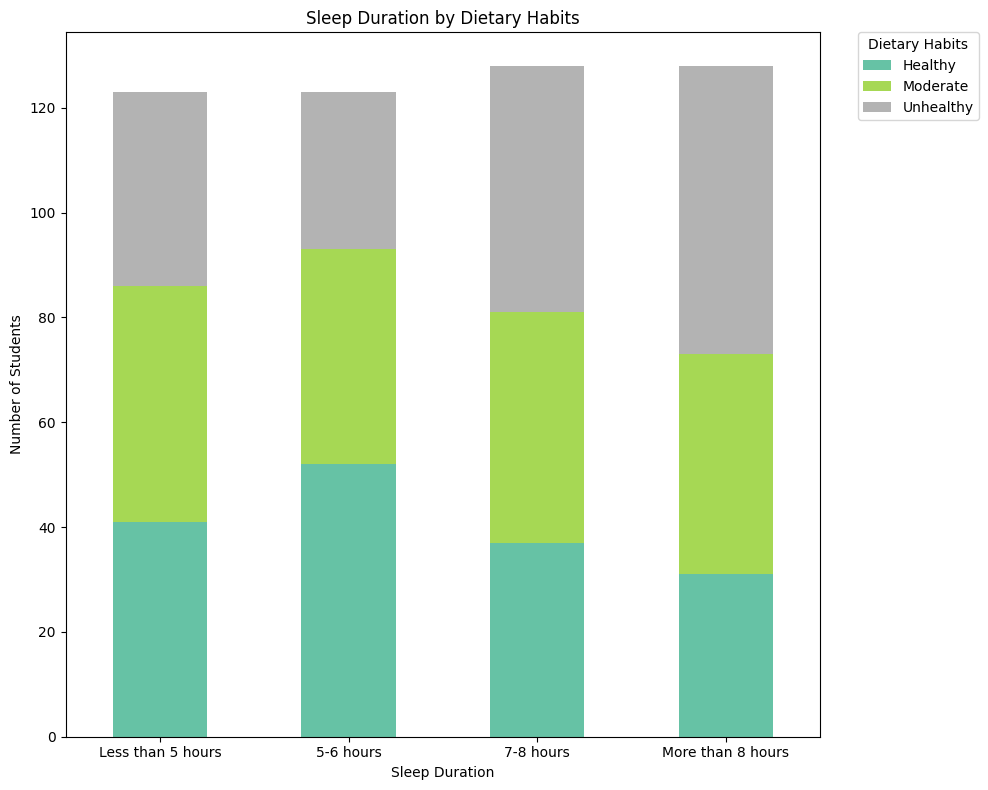

In [64]:
dataset1['Sleep Duration'] = pd.Categorical(dataset1['Sleep Duration'], categories=['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'])

def analyze_categorical_relationship(var1, var2, data, plot_title, xlabel, ylabel, colors):
    crosstab = pd.crosstab(data[var1], data[var2])
    print(f"Crosstab: {var1} vs. {var2}")
    print(crosstab)
    
    chi2, p, _, _ = stats.chi2_contingency(crosstab)
    print(f"\nChi-Squared Test Results: p-value = {p}")
    
    if p < 0.05:
        print(f"There is a significant association between {var1} and {var2}.\n")
    else:
        print(f"There is no significant association between {var1} and {var2}.\n")
    
    crosstab.plot(kind='bar', stacked=True, figsize=(10,8), colormap=colors)
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of Students')
    plt.xticks(rotation=0)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., title = 'Dietary Habits')
    plt.tight_layout()
    plt.show()

analyze_categorical_relationship('Sleep Duration', 'Dietary Habits', dataset1,
                                 'Sleep Duration by Dietary Habits', 'Sleep Duration', 
                                 'Dietary Habits', 'Set2')

Interestingly, it appears that there is a significant association between sleep duration and dietary habits. Specifically, students getting fewer hours of sleep appear to have healthier dietary habits compared to those getting 8 or more hours.

Crosstab: suicidal thoughts vs. Family History of Mental Illness
Family History of Mental Illness   No  Yes
suicidal thoughts                         
No                                127  115
Yes                               138  122

Chi-Squared Test Results: p-value = 0.9644641414459728
There is no significant association between suicidal thoughts and Family History of Mental Illness.



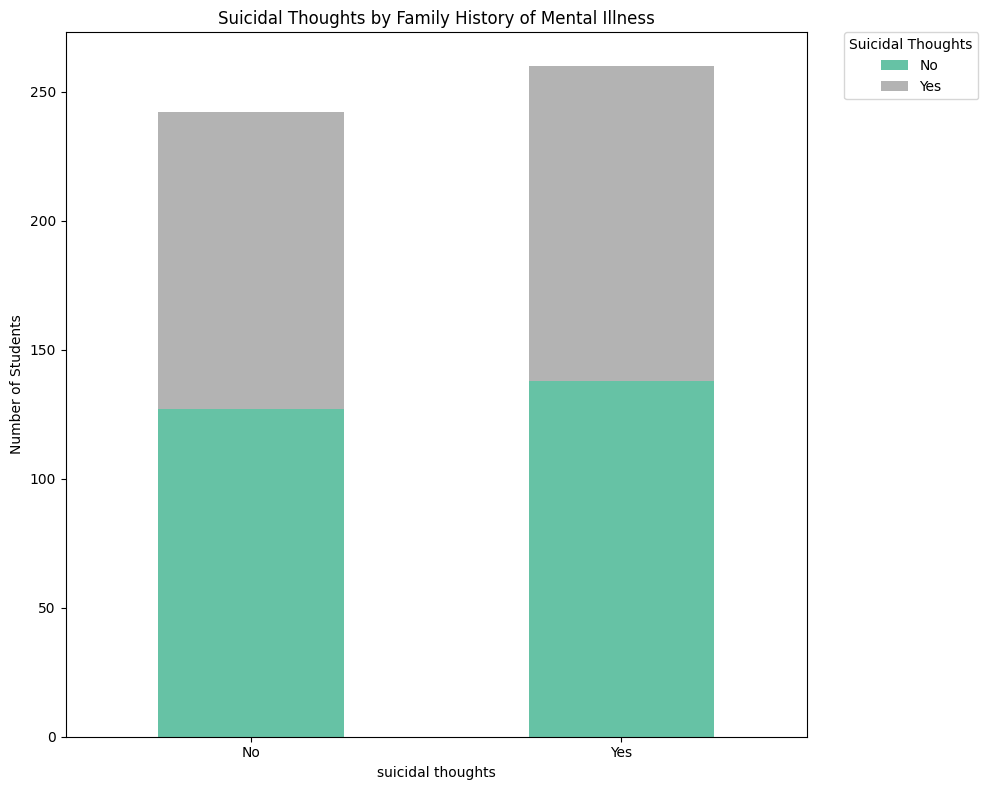

In [65]:
#dataset1['Sleep Duration'] = pd.Categorical(dataset1['Sleep Duration'], categories=['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'])

def analyze_categorical_relationship(var1, var2, data, plot_title, xlabel, ylabel, colors):
    crosstab = pd.crosstab(data[var1], data[var2])
    print(f"Crosstab: {var1} vs. {var2}")
    print(crosstab)
    
    chi2, p, _, _ = stats.chi2_contingency(crosstab)
    print(f"\nChi-Squared Test Results: p-value = {p}")
    
    if p < 0.05:
        print(f"There is a significant association between {var1} and {var2}.\n")
    else:
        print(f"There is no significant association between {var1} and {var2}.\n")
    
    crosstab.plot(kind='bar', stacked=True, figsize=(10,8), colormap=colors)
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of Students')
    plt.xticks(rotation=0)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., title = 'Suicidal Thoughts')
    plt.tight_layout()
    plt.show()

analyze_categorical_relationship('suicidal thoughts', 'Family History of Mental Illness', dataset1,
                                 'Suicidal Thoughts by Family History of Mental Illness', 
                                 'suicidal thoughts', 'Family History of Mental Illness', 'Set2')

Interestingly, family history of mental illness and thoughts of suicidality are not significantly realted in any way in this dataset. This is rather surprising, but novel.

Crosstab: suicidal thoughts vs. Gender
Gender             Female  Male
suicidal thoughts              
No                    120   122
Yes                   115   145

Chi-Squared Test Results: p-value = 0.26605170138623613
There is no significant association between suicidal thoughts and Gender.



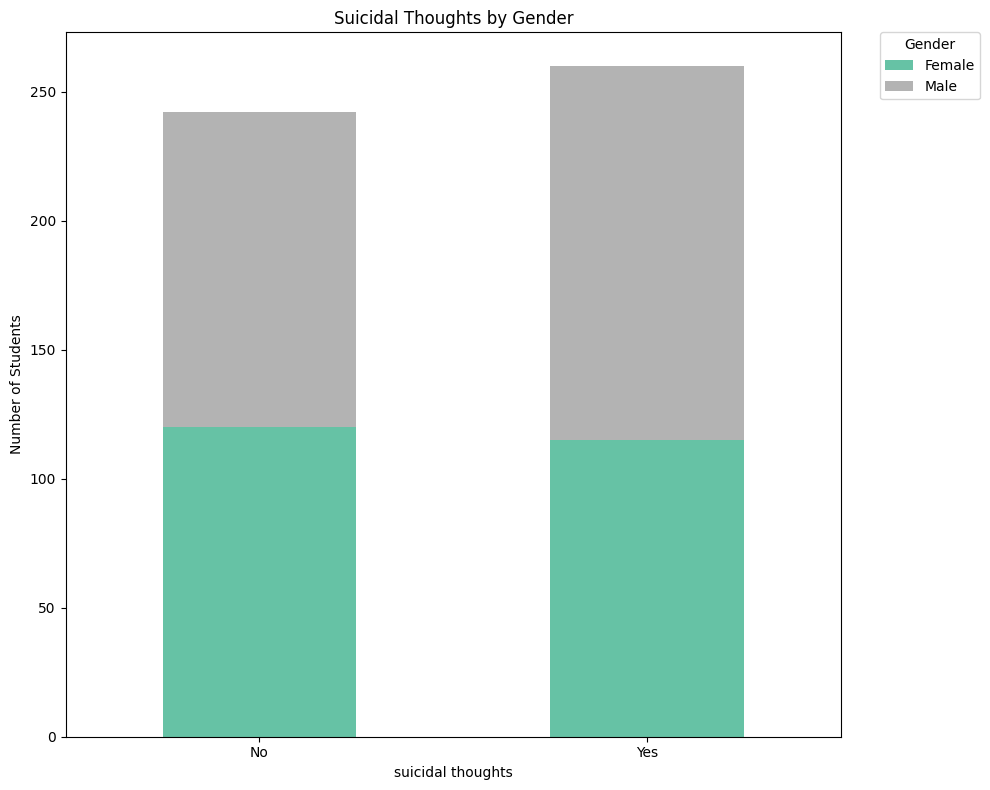

In [66]:
def analyze_categorical_relationship(var1, var2, data, plot_title, xlabel, ylabel, colors):
    crosstab = pd.crosstab(data[var1], data[var2])
    print(f"Crosstab: {var1} vs. {var2}")
    print(crosstab)
    
    chi2, p, _, _ = stats.chi2_contingency(crosstab)
    print(f"\nChi-Squared Test Results: p-value = {p}")
    
    if p < 0.05:
        print(f"There is a significant association between {var1} and {var2}.\n")
    else:
        print(f"There is no significant association between {var1} and {var2}.\n")
    
    crosstab.plot(kind='bar', stacked=True, figsize=(10,8), colormap=colors)
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of Students')
    plt.xticks(rotation=0)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., title = 'Gender')
    plt.tight_layout()
    plt.show()

analyze_categorical_relationship('suicidal thoughts', 'Gender', dataset1,
                                 'Suicidal Thoughts by Gender', 
                                 'suicidal thoughts', 'Gender', 'Set2')

There are no significant relationships between thoughts of suicidality and gender, as well. 

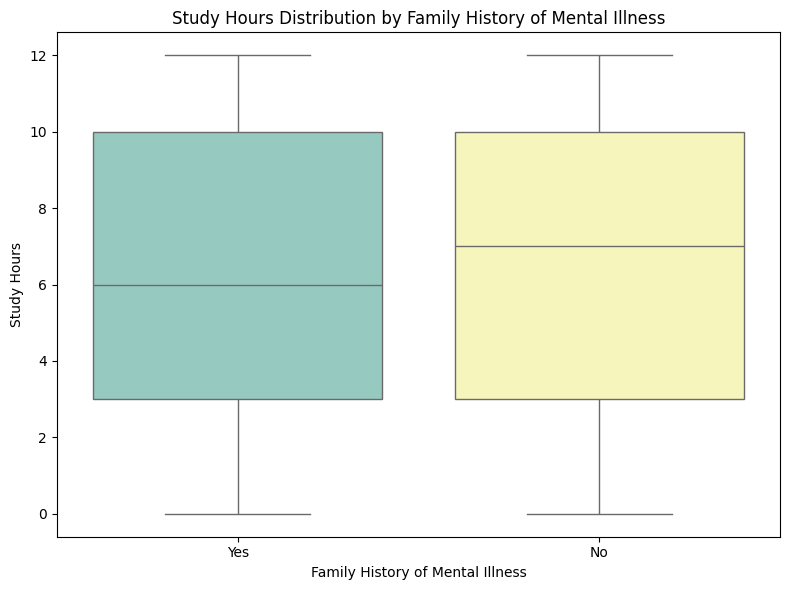

ANOVA Test for Family History of Mental Illness on Exam Score: H = 0.0002, p-value = 0.99
No significant differences in Exam Scores across Family History of Mental Illness levels.



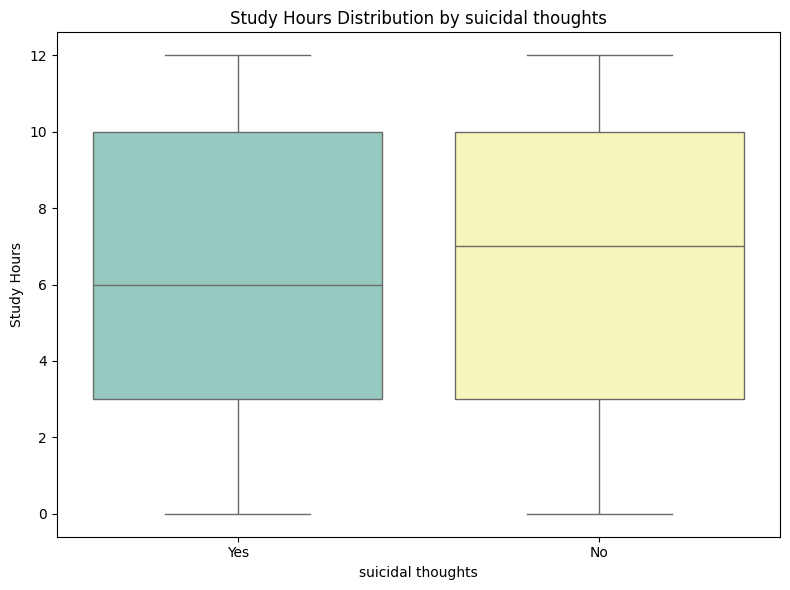

ANOVA Test for suicidal thoughts on Exam Score: H = 0.0403, p-value = 0.84
No significant differences in Exam Scores across suicidal thoughts levels.



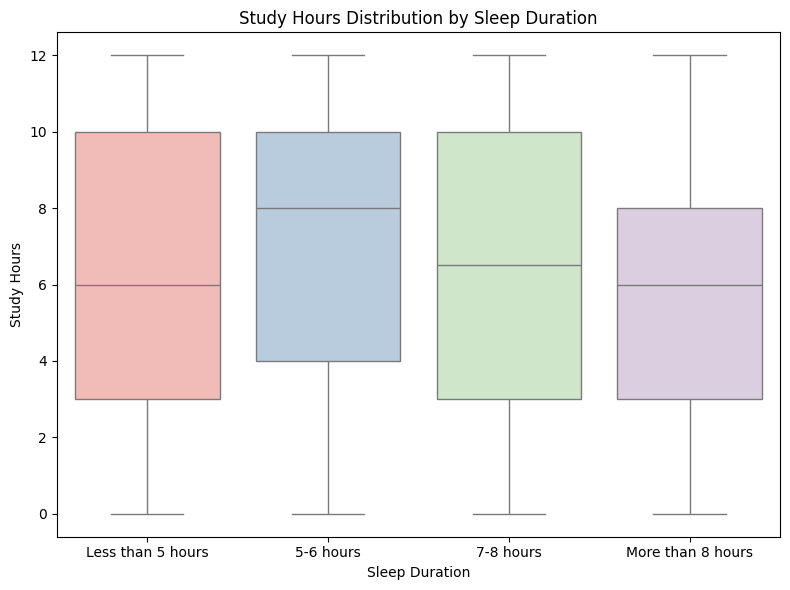

ANOVA Test for Sleep Duration on Exam Score: H = 10.0093, p-value = 0.02
We see differences in Exam Scores across Sleep Duration levels.



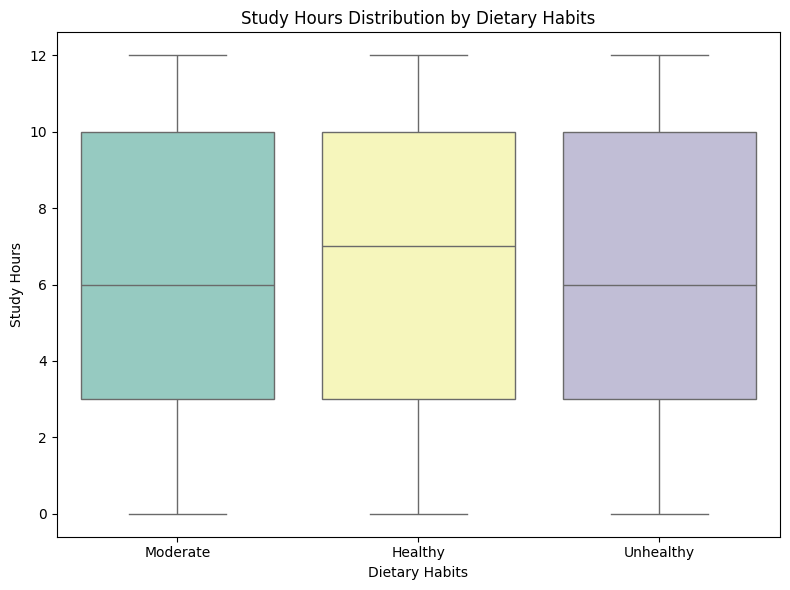

ANOVA Test for Dietary Habits on Exam Score: H = 0.6308, p-value = 0.73
No significant differences in Exam Scores across Dietary Habits levels.



In [70]:
from scipy.stats import kruskal

def anova_test_plot(var, data, palette, title):
    plt.figure(figsize=(8,6))
    sns.boxplot(x=var, y='Study Hours', data=data, hue=var, dodge=False, palette=palette)
    plt.title(f'Study Hours Distribution by {var}')
    plt.xlabel(var)
    plt.ylabel('Study Hours')
    plt.tight_layout()
    plt.show()

    groups = [data['Study Hours'][data[var] == level] for level in data[var].unique()]
    h_val, p_val = kruskal(*groups)
    print(f"ANOVA Test for {var} on Exam Score: H = {round(h_val,4)}, p-value = {round(p_val, 2)}")
    
    if p_val < 0.05:
        print(f"We see differences in Exam Scores across {var} levels.\n")
    else:
        print(f"No significant differences in Exam Scores across {var} levels.\n")

anova_test_plot('Family History of Mental Illness', dataset1, 'Set3', 'Study Hours Distribution by Family History of Mental Illness')
anova_test_plot('suicidal thoughts', dataset1, 'Set3', 'Study Hours Distribution by Suicidal Thoughts')
anova_test_plot('Sleep Duration', dataset1, 'Pastel1', 'Study Hours Distribution by Sleep Duration')
anova_test_plot('Dietary Habits', dataset1, 'Set3', 'Study Hours Distribution by Dietary Habits')

Based on the distributions above, even when accounting for the non-normality of the data via the use of Kruskal-Wallis Tests,  we only see a signficant effect of sleep duration on study habits such that sleeping more than 8 hours a night predicts lower exam scores. This is fairly interesting, as one would expect a better study habits among those getting more sleep compared to less.

Furthermore, we can see that dietary habits, family history of mental illness, and suicidal thoughts are not associated with study habits. This would suggest that, among this sample, study hours are not influencing study habits in any way.
However, it is still important to note that the uniformity of the numerical variables may at least somewhat account for the lack of statistical significance seen here.

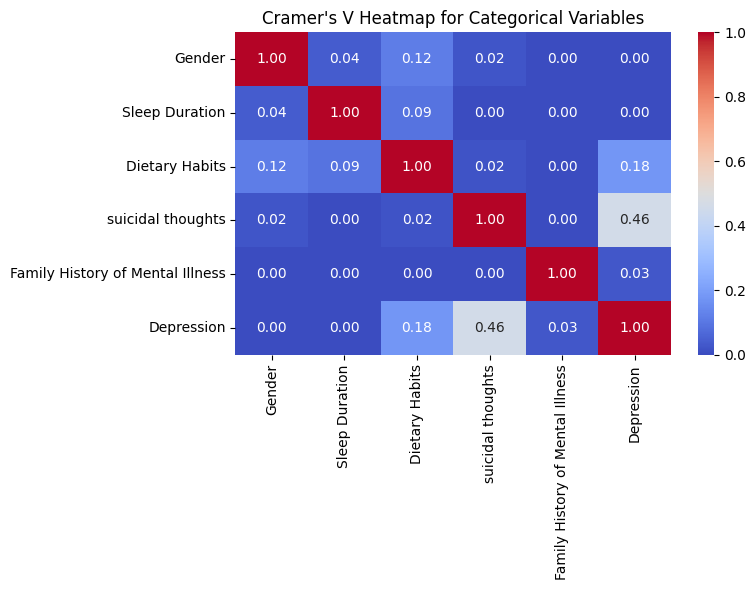

In [71]:
def cramers_v_heatmap(vars, data, title):
    cramers_v_matrix = pd.DataFrame(index=vars, columns=vars)
    
    for var1 in vars:
        for var2 in vars:
            if var1 == var2:
                cramers_v_matrix.loc[var1, var2] = 1.0
            else:
                cramers_v_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.tight_layout()
    plt.show()

categorical_vars_dep = ['Gender', 'Sleep Duration', 'Dietary Habits', 'suicidal thoughts', 'Family History of Mental Illness', 'Depression']
cramers_v_heatmap(categorical_vars_dep, dataset1, "Cramer's V Heatmap for Categorical Variables")

While some correlations are clearly present, most of the relationships present are rather weak. Importantly, weak relationships are even seen among our predictors and outcome (depression). This may impact our models going forward.

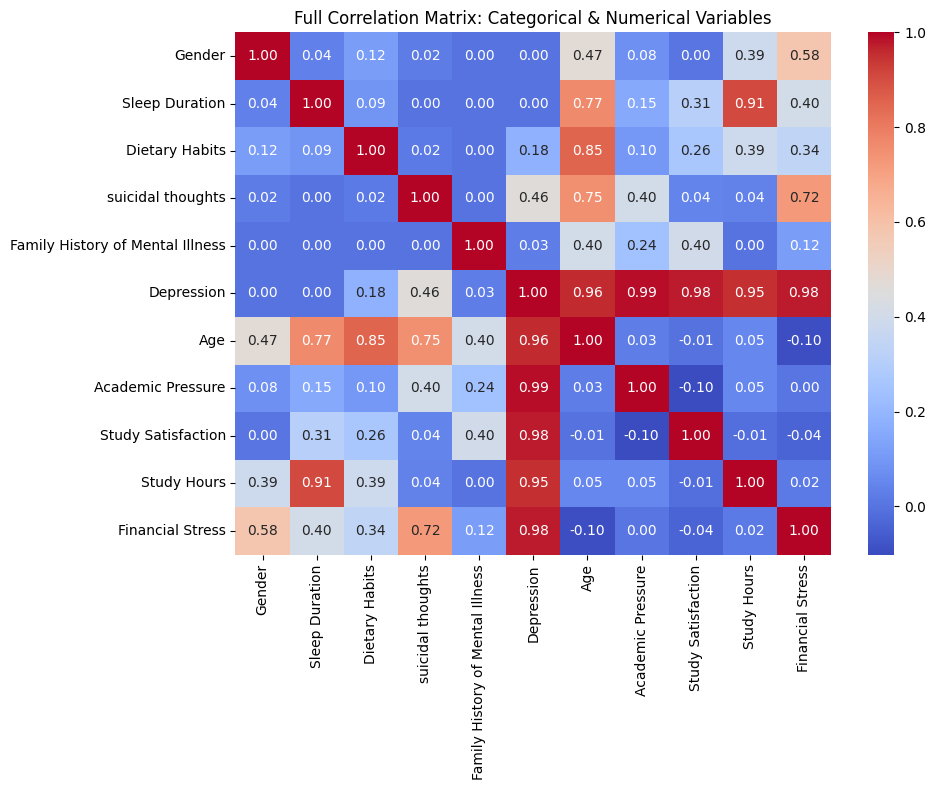

In [73]:
def mixed_correlation_heatmap(categorical_vars, numerical_vars, data):
    combined_vars = categorical_vars + numerical_vars
    correlation_matrix_full = pd.DataFrame(index=combined_vars, columns=combined_vars)
    
    for var1 in categorical_vars:
        for var2 in categorical_vars:
            if var1 == var2:
                correlation_matrix_full.loc[var1, var2] = 1.0
            else:
                correlation_matrix_full.loc[var1, var2] = cramers_v(data[var1], data[var2])

    # Numerical-numerical: Pearson correlation
    for var1 in numerical_vars:
        for var2 in numerical_vars:
            correlation_matrix_full.loc[var1, var2] = data[[var1, var2]].corr().iloc[0, 1]

    # Categorical-numerical: ANOVA F-test transformed into correlation-like values
    for cat_var in categorical_vars:
        for num_var in numerical_vars:
            groups = [data[num_var][data[cat_var] == level] for level in data[cat_var].unique()]
            f_val, _ = stats.kruskal(*groups)
            correlation_matrix_full.loc[cat_var, num_var] = correlation_matrix_full.loc[num_var, cat_var] = f_val / (1 + f_val)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_full.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Full Correlation Matrix: Categorical & Numerical Variables')
    plt.tight_layout()
    plt.show()

numerical_vars = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']
mixed_correlation_heatmap(categorical_vars_dep, numerical_vars, dataset1)

Using a fuller matrix, we can see more prominent relationships among our predictors and outcome. Specifically, age, academic pressure, study satisfaction, study hours, and financial stress are highly related to an outcome of depression, indicating that greater academic and economic pressures are related to depression.